In [1]:
import numpy as np
import matplotlib.pyplot as plt

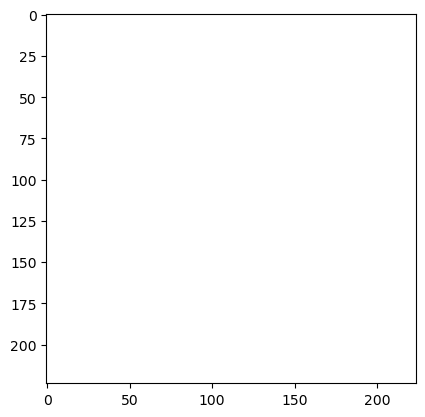

In [2]:
plt.imshow(np.ones((224, 224, 3)))
plt.show()

In [3]:
from model_helper import ModelHelper
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from load_data import load_dataset
import torch

In [4]:
full_dataset = load_dataset()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
# Load the pretrained model
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
print(model)
# Freeze all layers

for param in model.parameters():
    param.requires_grad = False

for param in model.layer4.parameters():
    param.requires_grad = True

for param in model.layer3.parameters():
    param.requires_grad = True
    

model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 512),
    nn.ReLU(),
    nn.Linear(512, 3)
)

for param in model.fc.parameters():
    param.requires_grad = True
    

# Modify the final layer for 3 classes
#num_ftrs = model.fc.in_features
#model.fc = nn.Linear(num_ftrs, 3)  # 3 classes: Normal, Alzheimer's, Parkinson's

model = model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [6]:
criterion = nn.CrossEntropyLoss(label_smoothing=0.2)

# Only parameters of the final layer are being optimized
optimizer = (optim.AdamW(model.parameters(), weight_decay=1e-3, betas=(0.9, 0.98), amsgrad=True))


In [7]:
mHelper = ModelHelper(model, full_dataset, device, model_name='ResNet50')

history = mHelper.train_model(criterion, optimizer, num_epochs=20)

Device: cuda:0
Epoch [1/20]
----------
train Loss: 0.7292 train Acc: 80.88%
val Loss: 0.7172 val Acc: 82.25%
--------------------------------------------------------------
Epoch [2/20]
----------
train Loss: 0.6509 train Acc: 86.67%
val Loss: 0.6344 val Acc: 87.96%
--------------------------------------------------------------
Epoch [3/20]
----------
train Loss: 0.6139 train Acc: 90.33%
val Loss: 0.6163 val Acc: 89.63%
--------------------------------------------------------------
Epoch [4/20]
----------
train Loss: 0.5824 train Acc: 92.83%
val Loss: 0.5949 val Acc: 92.62%
--------------------------------------------------------------
Epoch [5/20]
----------
train Loss: 0.5600 train Acc: 94.97%
val Loss: 0.5864 val Acc: 92.62%
--------------------------------------------------------------
Epoch [6/20]
----------
train Loss: 0.5392 train Acc: 96.37%
val Loss: 0.6166 val Acc: 91.65%
--------------------------------------------------------------
Epoch [7/20]
----------
train Loss: 0.5324 

In [8]:
mHelper.evaluate_model(criterion=criterion)

Test Accuracy: 95.43%, Test Loss: 0.5520


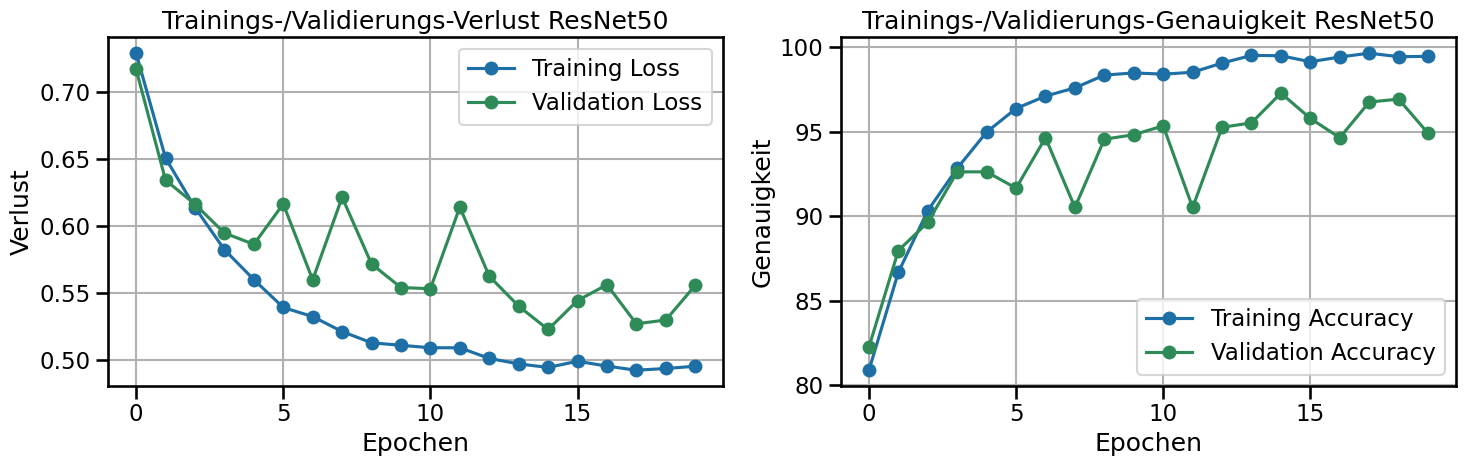

In [9]:
mHelper.plot_losses_and_accuracies()

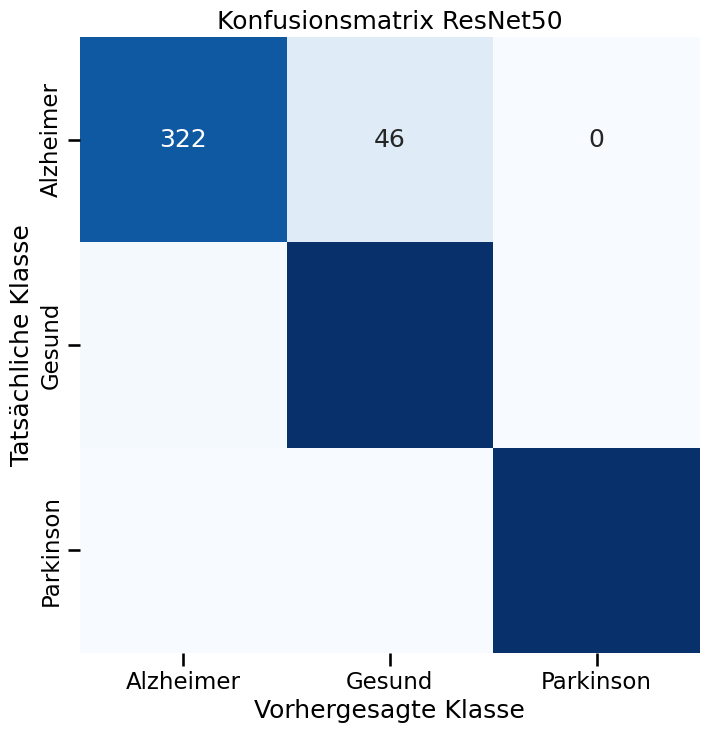

In [19]:
mHelper.plot_confusion_matrix()

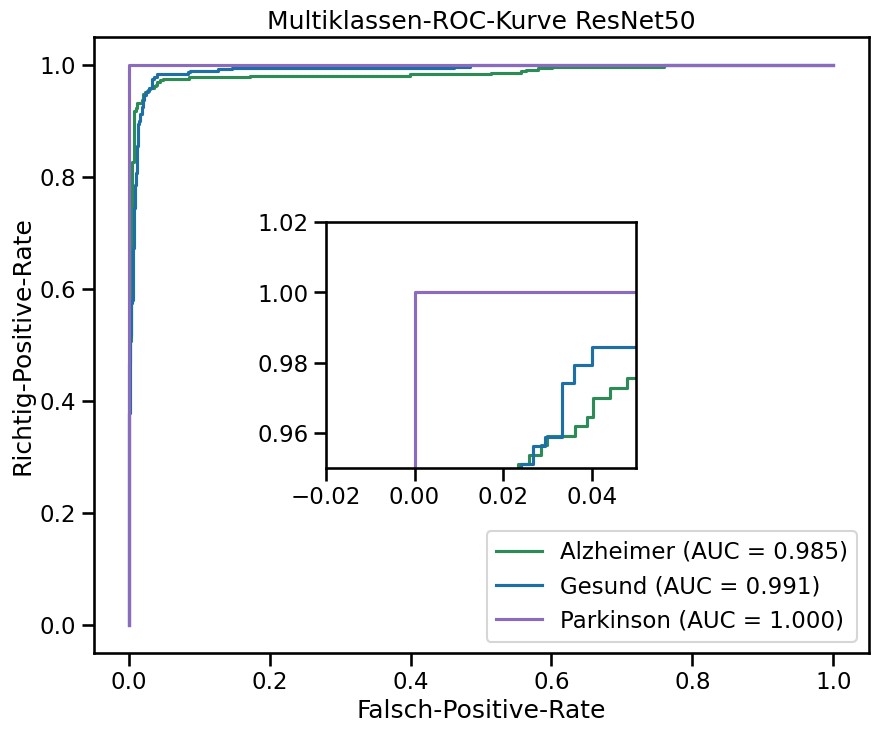

In [20]:
mHelper.plot_multiclass_roc()

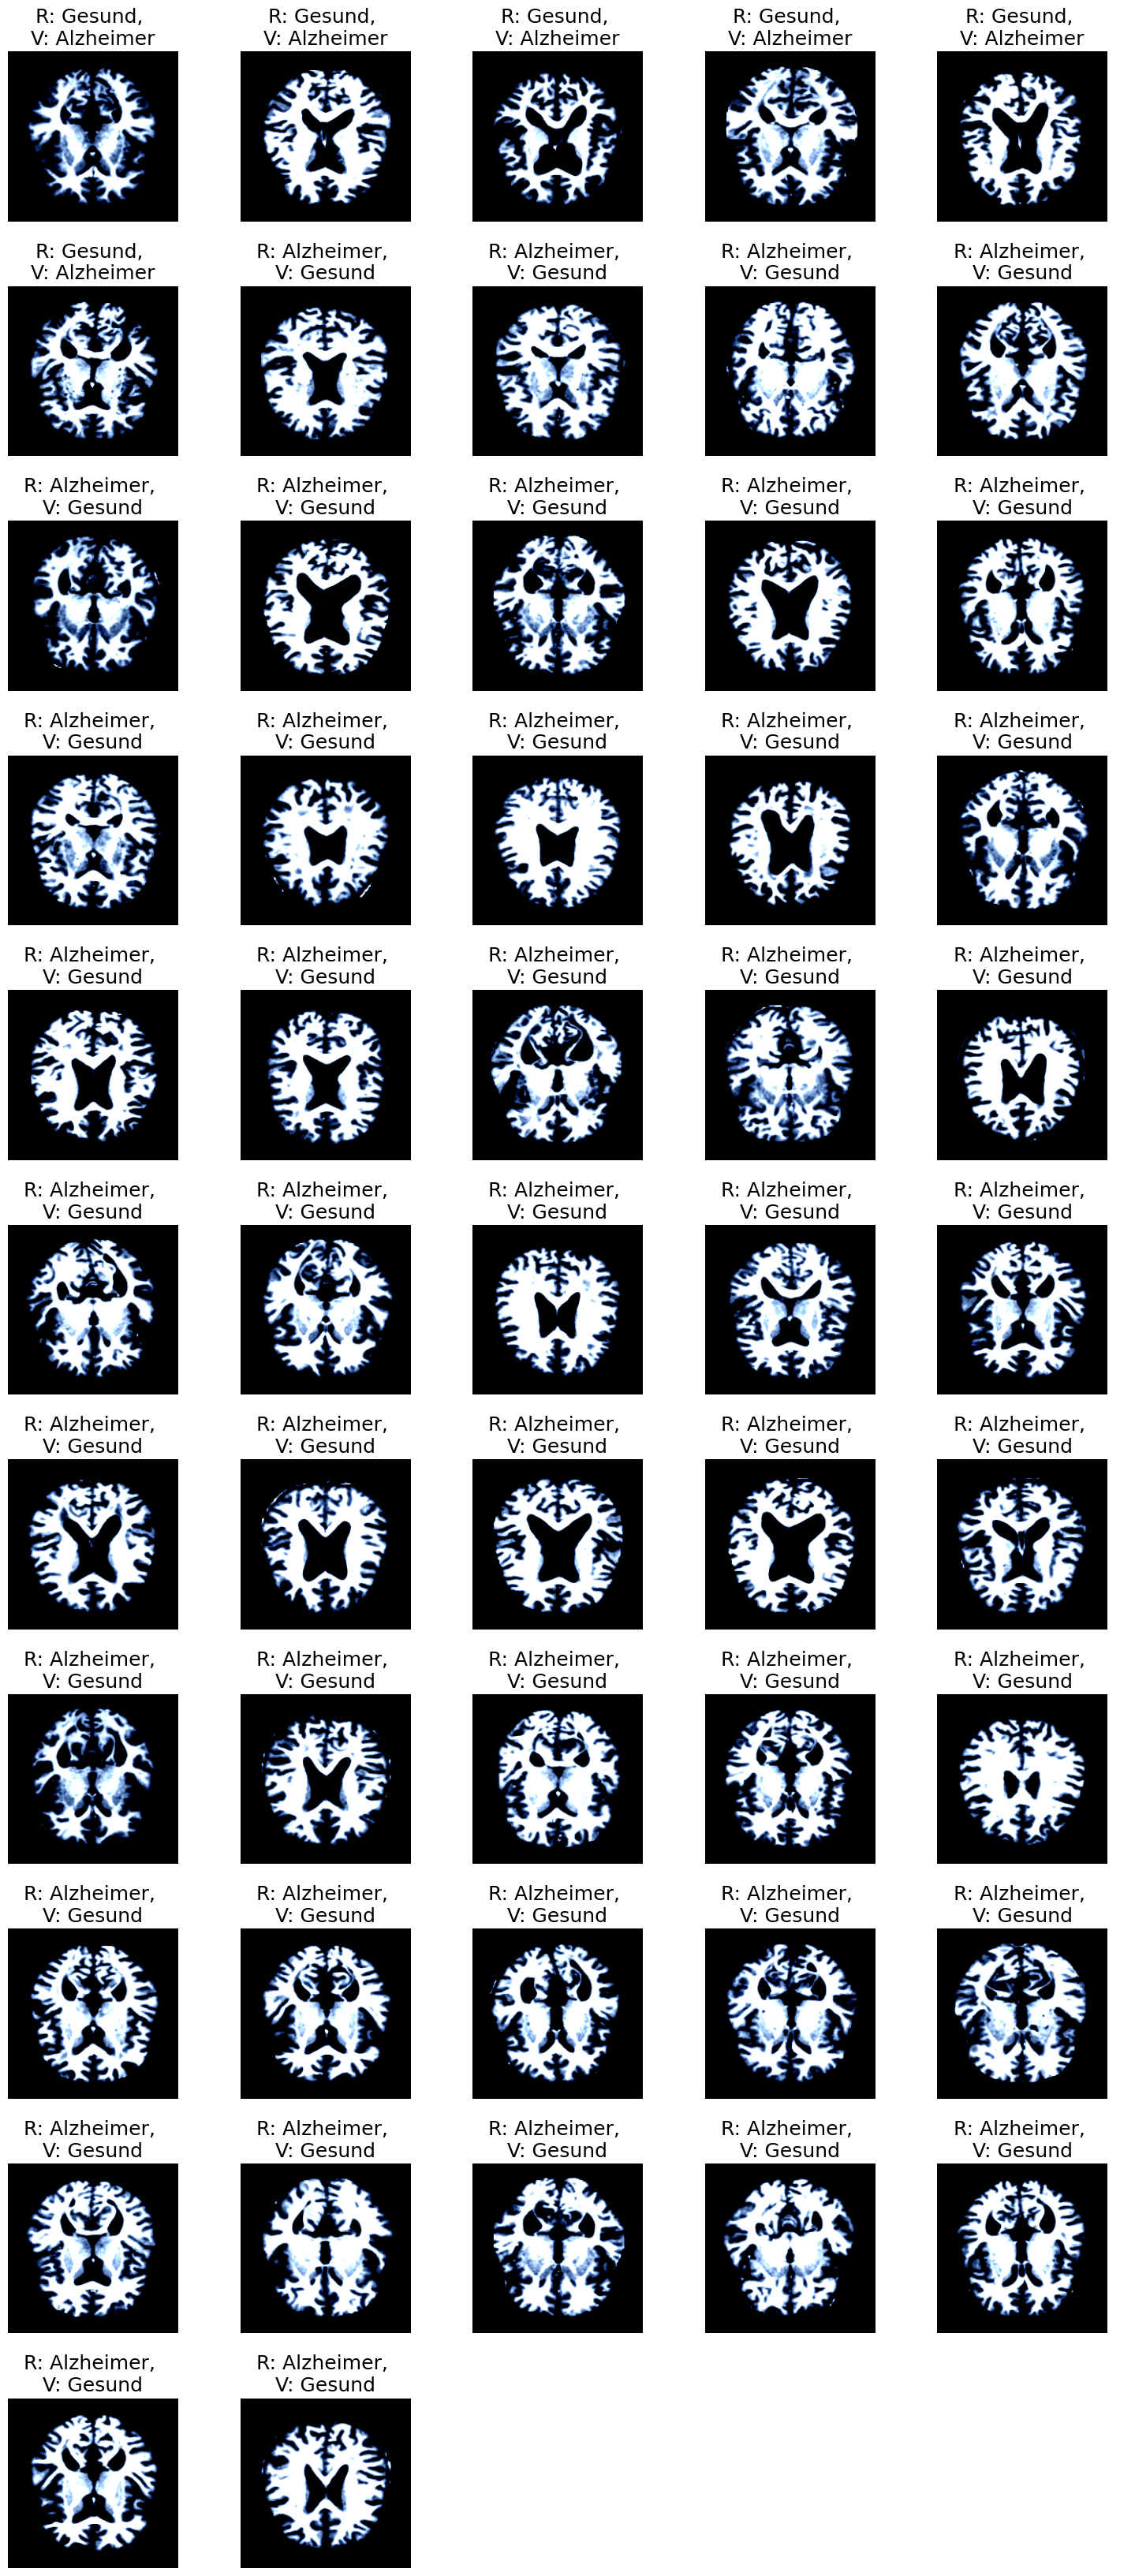

In [21]:
mHelper.plot_incorrect_images()

In [13]:
mHelper.save_model()

ModelHelper saved to models/ResNet50_20241111_1559-95.43.pth
